Found 14983 images belonging to 30 classes.
Found 1496 images belonging to 30 classes.


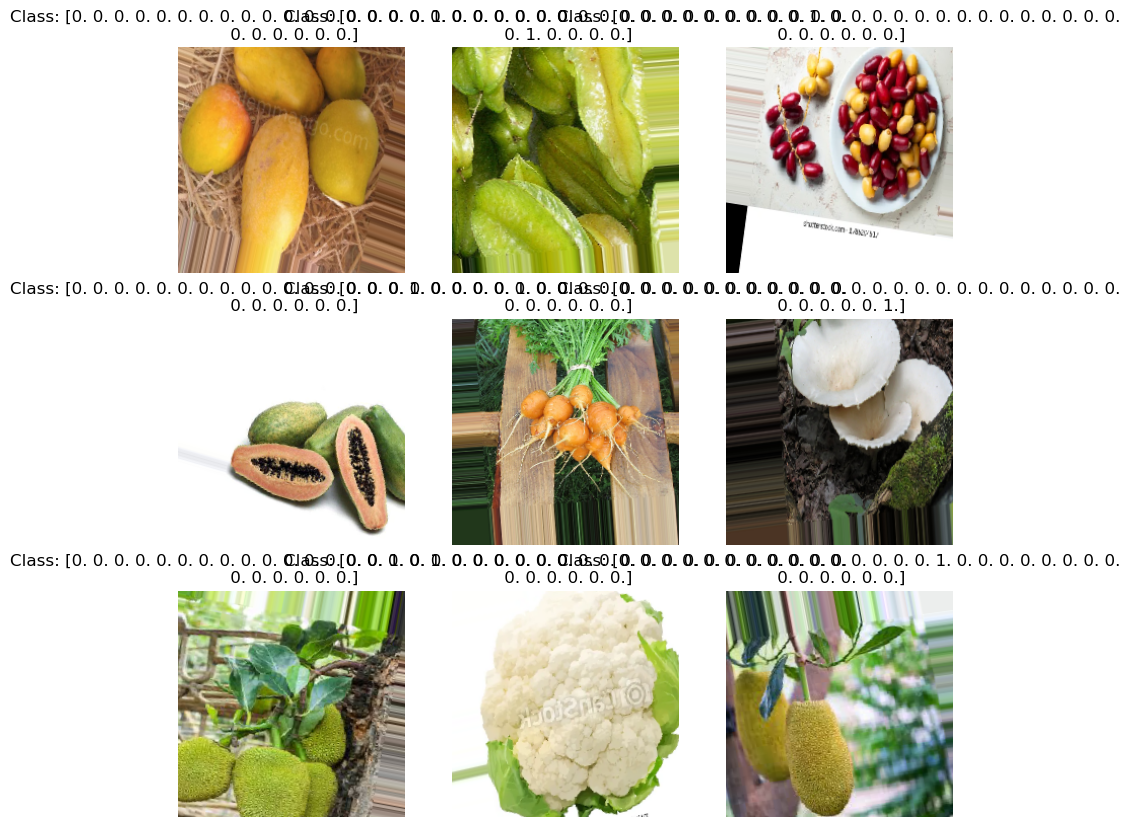

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 14/468 ━━━━━━━━━━━━━━━━━━━━ 4:24 583ms/step - accuracy: 0.0801 - loss: 3.4780

/opt/anaconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


429/468 ━━━━━━━━━━━━━━━━━━━━ 19s 496ms/step - accuracy: 0.6479 - loss: 1.3144

/opt/anaconda3/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


468/468 ━━━━━━━━━━━━━━━━━━━━ 250s 530ms/step - accuracy: 0.6597 - loss: 1.2673 - val_accuracy: 0.9185 - val_loss: 0.2731
Epoch 2/10
  1/468 ━━━━━━━━━━━━━━━━━━━━ 1:53 243ms/step - accuracy: 0.8438 - loss: 0.6402

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.8438 - loss: 0.6402 - val_accuracy: 0.9185 - val_loss: 0.2753
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 252s 538ms/step - accuracy: 0.8896 - loss: 0.3629 - val_accuracy: 0.9382 - val_loss: 0.1891
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9062 - loss: 0.2652 - val_accuracy: 0.9395 - val_loss: 0.1881
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 255s 544ms/step - accuracy: 0.9215 - loss: 0.2555 - val_accuracy: 0.9552 - val_loss: 0.1386
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8438 - loss: 0.4376 - val_accuracy: 0.9572 - val_loss: 0.1386
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 258s 551ms/step - accuracy: 0.9327 - loss: 0.2141 - val_accuracy: 0.9728 - val_loss: 0.0944
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9375 - loss: 0.2236 - val_accuracy: 0.9749 - val_loss: 0.0934
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 291s 622ms/step - accuracy: 0.9369 - loss: 0.1867 - val

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Set parameters
img_height, img_width = 224, 224  # MobileNetV2 input size
batch_size = 32
epochs = 10  # Adjust based on your dataset size and training time

# Define paths
train_data_dir = '/Users/shivanjanivuppula/Desktop/major/archive/train'  # Update with your training data path
validation_data_dir = '/Users/shivanjanivuppula/Desktop/major/archive/validation'  # Update with your validation data path

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Display some images from the training set
def show_images(generator, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i]}")
        plt.axis("off")
    plt.show()

show_images(train_generator)

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Create the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up model checkpointing
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint]
)

print("Training complete. Best model saved as 'best_model.keras'.")